## Regression
### Fahad Ahmed

In [1]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/3rdyear/dataSci/hw8/EmployeeSalaryRegression.csv')

In [3]:
df

,Age,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobLevel,JobRole,MaritalStatus,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome
0,41,Sales,1,2,Life Sciences,Female,94,2,Sales Executive,Single,...,3,0,8,0,1,6,4,0,5,5993
1,49,Research & Development,8,1,Life Sciences,Male,61,2,Research Scientist,Married,...,4,1,10,3,3,10,7,1,7,5130
2,37,Research & Development,2,2,Other,Male,92,1,Laboratory Technician,Single,...,3,0,7,3,3,0,0,0,0,2090
3,33,Research & Development,3,4,Life Sciences,Female,56,1,Research Scientist,Married,...,3,0,8,3,3,8,7,3,0,2909
4,27,Research & Development,2,1,Medical,Male,40,1,Laboratory Technician,Married,...,3,1,6,3,3,2,2,2,2,3468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,23,2,Medical,Male,41,2,Laboratory Technician,Married,...,3,1,17,3,3,5,2,0,3,2571
1466,39,Research & Development,6,1,Medical,Male,42,3,Healthcare Representative,Married,...,3,1,9,5,3,7,7,1,7,9991
1467,27,Research & Development,4,3,Life Sciences,Male,87,2,Manufacturing Director,Married,...,4,1,6,0,3,6,2,0,3,6142
1468,49,Sales,2,3,Medical,Male,63,2,Sales Executive,Married,...,3,0,17,3,2,9,6,0,8,5390


# Q1

In [4]:
model1 = ols("MonthlyIncome ~ TotalWorkingYears", data=df).fit()

In [5]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2178.
Date:                Thu, 17 Nov 2022   Prob (F-statistic):          2.73e-292
Time:                        19:01:55   Log-Likelihood:                -13848.
No. Observations:                1470   AIC:                         2.770e+04
Df Residuals:                    1468   BIC:                         2.771e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1227.9353    137.299      8.944      0.000     958.612    1497.259
TotalWorkingYears   467.6584     10.021     46.669      0.000     448.002     487.315
==============================================================================
Omnibus:                       47.473   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.304
Skew:                           0.269   Prob(JB):                     6.02e-18
Kurtosis:                       4.003   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### y-interception = Intercept = 1227 ~ 1228: it means that staring salary for the employee is 1227
### gradient = 467: If working year of employee increases by 1 unit so the avegrage monthly income increases by 467 for the employee.

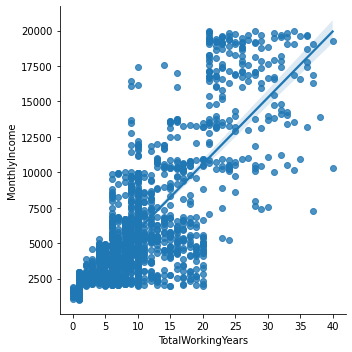

In [6]:
sns.lmplot(x='TotalWorkingYears', y='MonthlyIncome', data=df)

## y-axis = "monthlyincome", x-axis = "totalworkingyears"
as we can see from the graph above that "totalworkingyears" and "monthlyincome" has positive linear relationship.

# Q2

In [7]:
X = df.drop(['DistanceFromHome'],axis=1)
Y = df['DistanceFromHome']

In [8]:
model2 = sm.OLS(Y,sm.add_constant(X['Age'])).fit()

In [9]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       DistanceFromHome   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.004174
Date:                Thu, 17 Nov 2022   Prob (F-statistic):              0.948
Time:                        19:01:56   Log-Likelihood:                -5161.6
No. Observations:                1470   AIC:                         1.033e+04
Df Residuals:                    1468   BIC:                         1.034e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2478      0.881     10.497      0.000       7.520      10.976
Age           -0.0015      0.023     -0.065      0.948      -0.047       0.044
==============================================================================
Omnibus:                      168.749   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.762
Skew:                           0.957   Prob(JB):                     3.48e-50
Kurtosis:                       2.773   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### there is no relation between "Age" and "DistanceFromHome" because R-squared value is 0.0 and p-value is greater than 0.05 so it means there is no connection between "Age" and "DistanceFromHome" and also the gradient is also very close to 0 so no relation
y-interception = const = 9.247. which means that when the Age is 0 the DistanceFromHome of that person is 9.274 units. 

Text(0, 0.5, 'DistanceFromHome')

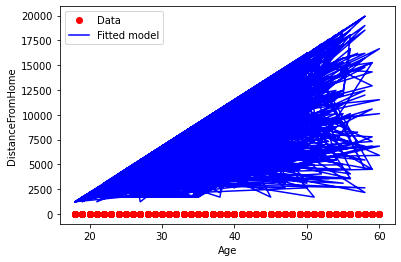

In [10]:
plt.plot(df['Age'],df['DistanceFromHome'],'ro')
plt.plot(df['Age'],model1.fittedvalues,  'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('Age')
plt.ylabel('DistanceFromHome')

### As we can see from the above graph that there is no relation between "Age" and 'DistanceFromHome' because there is horizontal line of bestfit and the gradient from above summary is almost zero. so we can conclude that with increase or decrese in "Age", the "DistanceFromHome" does not change.

## q3

In [11]:
df3 = df[['DistanceFromHome','MonthlyIncome','TotalWorkingYears','Age']]

In [12]:
df3.corr()

,DistanceFromHome,MonthlyIncome,TotalWorkingYears,Age
DistanceFromHome,1.000000,-0.017014,0.004628,-0.001686
MonthlyIncome,-0.017014,1.000000,0.772893,0.497855
TotalWorkingYears,0.004628,0.772893,1.000000,0.680381
Age,-0.001686,0.497855,0.680381,1.000000


### the correlation between Age and DistancefromHome is weak negative/postive linear relationship because the value is very close to 0
### the correlation between Monthlyincome and DistancefromHome is weak negative/postive linear relationship because the value is very close to 0 
### the correlation between totalworkingyears and DistancefromHome is weak negative/postive linear relationship because the value is very close to 0 

### the correlation between Monthlyincome and totalworkingyears is strong postive linear relationship because the value is close to 1
### the correlation between Monthlyincome and Age is postive linear relationship because the value is between 0 and 1

### the correlation between Age and totalworkingyears is postive linear relationship because the value is closer to 1 

## q4

In [13]:
df1 = df.drop(['JobRole'],axis=1)

In [14]:
df1 = pd.get_dummies(df1, columns = ['Department','EducationField','Gender','MaritalStatus','OverTime'])

In [15]:
X = df1.drop(['MonthlyIncome'],axis=1)
Y = df1['MonthlyIncome']

In [16]:
modelall = sm.OLS(Y,sm.add_constant(X)).fit()

In [17]:
modelall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     553.6
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:01:57   Log-Likelihood:                -12756.
No. Observations:                1470   AIC:                         2.557e+04
Df Residuals:                    1443   BIC:                         2.571e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              -505.3012    157.844     -3.201      0.001    -814.930    -195.673
Age                                 -11.7080      5.871     -1.994      0.046     -23.225      -0.191
DistanceFromHome                    -12.5285      4.640     -2.700      0.007     -21.630      -3.426
Education                            -8.9850     37.792     -0.238      0.812     -83.119      65.149
HourlyRate                            2.3490      1.852      1.268      0.205      -1.284       5.982
JobLevel                           3837.4641     56.020     68.502      0.000    3727.575    3947.353
NumCompaniesWorked                    3.0231     16.809      0.180      0.857     -29.949      35.995
PerformanceRating                    27.7078    104.140      0.266      0.790    -176.574     231.990
StockOptionLevel                    -83.7209     60.423     -1.386      0.166    -202.248      34.806
TotalWorkingYears                    54.4121     10.461      5.201      0.000      33.892      74.932
TrainingTimesLastYear                -5.5468     29.423     -0.189      0.850     -63.264      52.170
WorkLifeBalance                     -11.3447     53.538     -0.212      0.832    -116.366      93.677
YearsAtCompany                       10.4545     13.079      0.799      0.424     -15.201      36.110
YearsInCurrentRole                  -15.4321     17.046     -0.905      0.365     -48.870      18.006
YearsSinceLastPromotion              18.5114     15.022      1.232      0.218     -10.956      47.979
YearsWithCurrManager                -49.7637     17.396     -2.861      0.004     -83.889     -15.639
Department_Human Resources          -32.5496    177.440     -0.183      0.854    -380.618     315.519
Department_Research & Development   -55.4496     99.943     -0.555      0.579    -251.499     140.600
Department_Sales                   -417.3020    109.672     -3.805      0.000    -632.436    -202.168
EducationField_Human Resources      111.3251    307.974      0.361      0.718    -492.799     715.449
EducationField_Life Sciences       -112.7923     91.523     -1.232      0.218    -292.324      66.739
EducationField_Marketing           -118.4517    139.941     -0.846      0.397    -392.961     156.057
EducationField_Medical              -60.6225     96.230     -0.630      0.529    -249.387     128.142
EducationField_Other               -249.8672    152.805     -1.635      0.102    -549.611      49.876
EducationField_Technical Degree     -74.8926    128.937     -0.581      0.561    -327.817     178.032
Gender_Female                      -276.9431     89.618     -3.090      0.002    -452.738    -101.148
Gender_Male                        -228.3582     85.914     -2.658      0.008    -396.887     -59.829
MaritalStatus_Divorced 

### 
Most signinfcant inputs: JobLevel, TotalWorkingYears, Department_Sales. because their p-value is zero or very close to zero. it means that they have big impact on the monthlyincome.
least signinfcant: NumCompaniesWorked, WorkLifeBalance, TrainingTimesLastYear. because their p-value is above 0.05 so it means they have less impact on monthlyincome

## model is 90.9% effectivesnnes because the r-sqaured value is 0.909 so it is pretty much effective

### the relation between MonthlyIncome and JobLevel is positive linear. the gradient between them is 3788 which means with every 1 unit increase in JobLevel the MonthlyIncome will increase by average of 3837 unit.
### the relation between MonthlyIncome and TrainingTimesLastYear is negative linear relationship. if employee increases his TrainingTimesLastYear by 1 unit then his MonthlyIncome will decrease by average of -5.5 units.
### MonthlyIncome and HourlyRate has postive linear relation. as from table we can see the relationship rate (gradient) as 2.36 which means that if employee's HourlyRate increases by 1 unit then his MonthlyIncome increases by average of 2.35 units 

In [18]:
dfn = df

In [19]:
dfn['Adult'] = 'No'
dfn.loc[dfn['Age'] > 30, 'Adult'] = 'Yes'

In [20]:
dfn = dfn.drop(['JobRole'],axis=1)

In [21]:
dfn = pd.get_dummies(dfn, columns = ["Adult",'Department','EducationField','Gender','MaritalStatus','OverTime'])

In [22]:
X = dfn.drop(['MonthlyIncome'],axis=1)
Y = dfn['MonthlyIncome']

In [23]:
modelall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     553.6
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:01:58   Log-Likelihood:                -12756.
No. Observations:                1470   AIC:                         2.557e+04
Df Residuals:                    1443   BIC:                         2.571e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              -505.3012    157.844     -3.201      0.001    -814.930    -195.673
Age                                 -11.7080      5.871     -1.994      0.046     -23.225      -0.191
DistanceFromHome                    -12.5285      4.640     -2.700      0.007     -21.630      -3.426
Education                            -8.9850     37.792     -0.238      0.812     -83.119      65.149
HourlyRate                            2.3490      1.852      1.268      0.205      -1.284       5.982
JobLevel                           3837.4641     56.020     68.502      0.000    3727.575    3947.353
NumCompaniesWorked                    3.0231     16.809      0.180      0.857     -29.949      35.995
PerformanceRating                    27.7078    104.140      0.266      0.790    -176.574     231.990
StockOptionLevel                    -83.7209     60.423     -1.386      0.166    -202.248      34.806
TotalWorkingYears                    54.4121     10.461      5.201      0.000      33.892      74.932
TrainingTimesLastYear                -5.5468     29.423     -0.189      0.850     -63.264      52.170
WorkLifeBalance                     -11.3447     53.538     -0.212      0.832    -116.366      93.677
YearsAtCompany                       10.4545     13.079      0.799      0.424     -15.201      36.110
YearsInCurrentRole                  -15.4321     17.046     -0.905      0.365     -48.870      18.006
YearsSinceLastPromotion              18.5114     15.022      1.232      0.218     -10.956      47.979
YearsWithCurrManager                -49.7637     17.396     -2.861      0.004     -83.889     -15.639
Department_Human Resources          -32.5496    177.440     -0.183      0.854    -380.618     315.519
Department_Research & Development   -55.4496     99.943     -0.555      0.579    -251.499     140.600
Department_Sales                   -417.3020    109.672     -3.805      0.000    -632.436    -202.168
EducationField_Human Resources      111.3251    307.974      0.361      0.718    -492.799     715.449
EducationField_Life Sciences       -112.7923     91.523     -1.232      0.218    -292.324      66.739
EducationField_Marketing           -118.4517    139.941     -0.846      0.397    -392.961     156.057
EducationField_Medical              -60.6225     96.230     -0.630      0.529    -249.387     128.142
EducationField_Other               -249.8672    152.805     -1.635      0.102    -549.611      49.876
EducationField_Technical Degree     -74.8926    128.937     -0.581      0.561    -327.817     178.032
Gender_Female                      -276.9431     89.618     -3.090      0.002    -452.738    -101.148
Gender_Male                        -228.3582     85.914     -2.658      0.008    -396.887     -59.829
MaritalStatus_Divorced 

### with new input no, the prediction of the model remains same. No change

## q5

In [24]:
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/dataSci/hw8/EmployeeSalaryRegression.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/HP/OneDrive/Desktop/dataSci/hw8/EmployeeSalaryRegression.csv'

In [ ]:
df1 = df.drop(['JobRole'],axis=1)

In [ ]:
df1 = pd.get_dummies(df1, columns = ['Department','EducationField','Gender','MaritalStatus','OverTime'])

In [ ]:
X = df1.drop(['HourlyRate'],axis=1)
Y = df1['HourlyRate']

In [ ]:
modelall = sm.OLS(Y,sm.add_constant(X)).fit()

In [ ]:
modelall.summary()

### MonthlyIncome and HourlyRate has no relation. as from table we can see the relationship rate (gradient) as almost zero (0.0005) which means that change employee's MonthlyIncome will not effect his HourlyRate, his HourlyRate will remain same 
### the relation between HourlyRate and Age is positive linear. the gradient between them is 0.68 which means with every 1 unit increase in Age the HourlyRate will increase by average of 0.68 unit.
### the relation between HourlyRate and StockOptionLevel is positive linear relationship. if employee increases his StockOptionLevel by 1 unit then his HourlyRate will increases by average of 1.4 units.

## model's effectiveness is 1.4% as we can see from above summary that R-squared value is 0.014 so we conclude that model is not effective

### 
Most signinfcant inputs: Department_Research & Development, Department_Sales, EducationField_Life Sciences. because their p-value is zero. it means that they have big impact on the HourlyRate.
least signinfcant: WorkLifeBalance, YearsWithCurrManager, TrainingTimesLastYear. because their p-value is above 0.05 so it means they have very less impact on HourlyRate

In [ ]:
dfn = df

In [ ]:
dfn['GoodLife'] = 'No'
dfn.loc[dfn['WorkLifeBalance'] > 2, 'GoodLife'] = 'Yes'

In [ ]:
dfn = dfn.drop(['JobRole'],axis=1)

In [ ]:
dfn = pd.get_dummies(dfn, columns = ["GoodLife",'Department','EducationField','Gender','MaritalStatus','OverTime'])

In [ ]:
X = dfn.drop(['HourlyRate'],axis=1)
Y = dfn['HourlyRate']

In [ ]:
modelall = sm.OLS(Y,sm.add_constant(X)).fit()

In [ ]:
modelall.summary()

#### with new input no, the prediction of the model remains same. No change

In [ ]:
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/dataSci/hw8/EmployeeSalaryRegression.csv')

In [ ]:
df1 = df.drop(['JobRole'],axis=1)

In [ ]:
df = df[['MonthlyIncome','JobLevel', 'TotalWorkingYears', 'Department']]

In [ ]:
df = pd.get_dummies(df, columns = ['Department'])

In [ ]:
X = df.drop(['MonthlyIncome'],axis=1)
Y = df['MonthlyIncome']

In [ ]:
modelall = sm.OLS(Y,sm.add_constant(X)).fit()

In [ ]:
modelall.summary()

### well in my new model the change in R-squared value is almost, decreased by 0.02, so it means both models are almost same accuracy/effectiveness is same. 
## I will still prefer this model because it only show details about the most significant inputs so more easy to look for information